# Exercício ISLANDER

## IMPORTAÇÃO DA BASE

In [1]:
import pandas as pd
df = pd.read_csv('Islander_data.csv')
df.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


In [ ]:
df.describe()

,age,Dosage,Mem_Score_Before,Mem_Score_After,Diff
count,198.000000,198.000000,198.000000,198.000000,198.000000
mean,39.530303,1.989899,57.967677,60.922222,2.954545
std,12.023099,0.818504,15.766007,18.133851,10.754603
min,24.000000,1.000000,27.200000,27.100000,-40.400000
25%,30.000000,1.000000,46.525000,47.175000,-3.175000
50%,37.000000,2.000000,54.800000,56.750000,1.700000
75%,48.000000,3.000000,68.400000,73.250000,5.925000
max,83.000000,3.000000,110.000000,120.000000,49.000000


In [ ]:
df.shape

(198, 9)

##Pandas Profiling

In [ ]:
!pip install pandas-profiling==2.10.0

     |████████████████████████████████| 266kB 3.9MB/s 
     |████████████████████████████████| 3.1MB 19.6MB/s 
     |████████████████████████████████| 1.1MB 33.5MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 81kB 8.2MB/s 
     |████████████████████████████████| 296kB 35.2MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107437 sha256=a7895c55a85a4b7269b133dc8e234d1a6acf52aa5c47237f60f04aa8203f0245
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=0b178d0028c1db12e31f0aaa34050ca2e3f17d5fd5215623a386d589cf6ca061
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing in

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Islander Data Profiling')
profile.to_file('islander_profile.html')

## Análise Exploratória

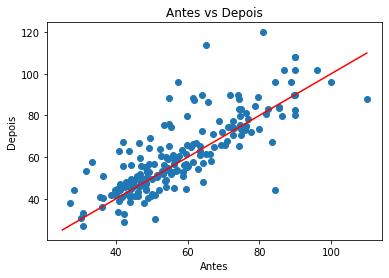

In [5]:
import matplotlib.pyplot as plt

# Análise mem score antes e depois
plt.scatter(data=df, x='Mem_Score_Before', y='Mem_Score_After')
plt.title('Antes vs Depois')
plt.xlabel('Antes')
plt.ylabel('Depois')

x = [25.0, 110.0]
plt.plot(x, x, color='red'); #reta onde y=x

In [ ]:
df.Drug.unique()

array(['A', 'S', 'T'], dtype=object)

In [3]:
# Análise do mem score antes e depois POR DROGA

xanax = df[df.Drug == 'A']
halcion = df[df.Drug == 'T']
placebo = df[df.Drug == 'S']

In [ ]:
print(xanax.shape)
print(halcion.shape)
print(placebo.shape)

(67, 9)
(65, 9)
(66, 9)


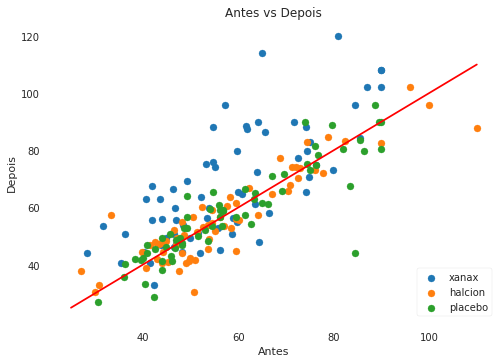

In [ ]:
# Análise do mem score antes e depois POR DROGA

plt.scatter(data=xanax, x='Mem_Score_Before', y='Mem_Score_After', label='xanax')
plt.scatter(data=halcion, x='Mem_Score_Before', y='Mem_Score_After', label='halcion')
plt.scatter(data=placebo, x='Mem_Score_Before', y='Mem_Score_After', label='placebo')

plt.legend(loc='lower right')
plt.title('Antes vs Depois')
plt.xlabel('Antes')
plt.ylabel('Depois')

x = [25.0, 110.0]
plt.plot(x, x, color='red'); #reta onde y=x

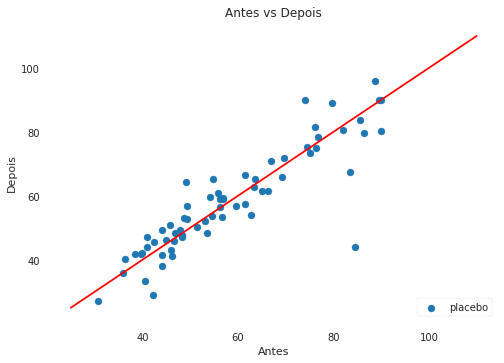

In [ ]:
# analisar somente o placebo
plt.scatter(data=placebo, x='Mem_Score_Before', y='Mem_Score_After', label='placebo')

plt.legend(loc='lower right')
plt.title('Antes vs Depois')
plt.xlabel('Antes')
plt.ylabel('Depois')

x = [25.0, 110.0]
plt.plot(x, x, color='red'); #reta onde y=x

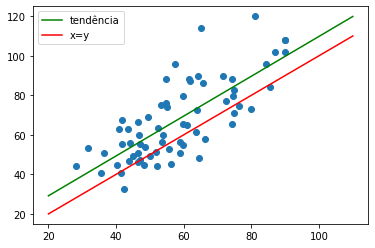

In [17]:
# analisar somente o placebo
# comparar y=x com tendência dos dados
import numpy as np
plt.scatter(data=xanax, x='Mem_Score_Before', y='Mem_Score_After')

linear_model = np.polyfit(np.asarray(xanax.Mem_Score_Before), 
                          np.asarray(xanax.Mem_Score_After), 
                          1)
fn = np.poly1d(linear_model)
x_s = [20,110]
plt.plot(x_s, fn(x_s), color='green')

# reta x=y ==> score antes = score depois
x = [20, 110]
plt.plot(x, x, color='red')

plt.legend(labels=['tendência', 'x=y'])

plt.show()

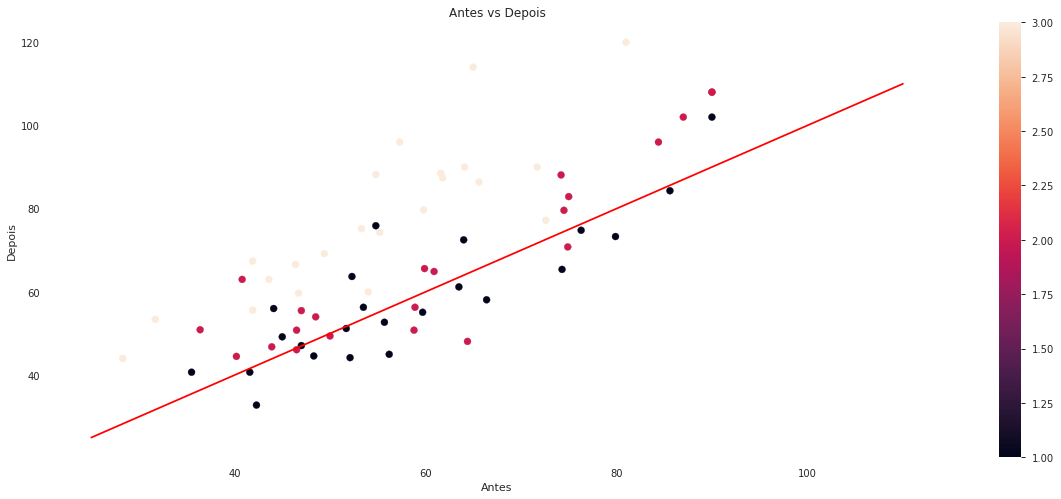

In [ ]:
# xanax dosagem vs. score de memória
plt.figure(figsize=(20,8))
plt.scatter(data=xanax, x='Mem_Score_Before', y='Mem_Score_After', c='Dosage')

plt.colorbar()  # c é númerico, por isso colorbar e não legend
plt.title('Antes vs Depois')
plt.xlabel('Antes')
plt.ylabel('Depois')

x = [25.0, 110.0]
plt.plot(x, x, color='red'); #reta onde y=x

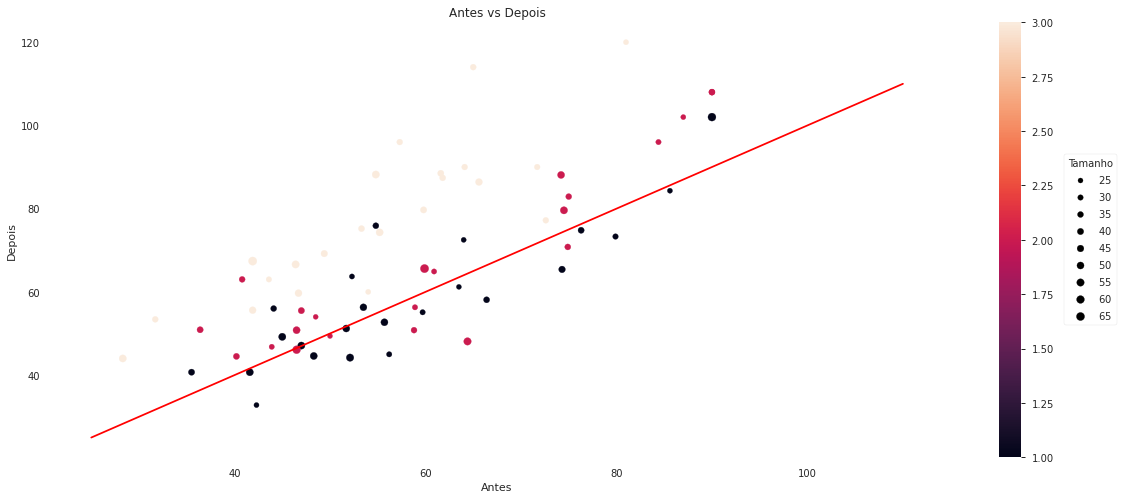

In [ ]:
# xanax dosagem vs. score de memória: tamanho dos pontos por idade

plt.figure(figsize=(20,8))
fig = plt.scatter(data=xanax, x='Mem_Score_Before', y='Mem_Score_After', c='Dosage', s='age')

plt.colorbar()  # c é númerico, por isso colorbar e não legend
handles, labels = fig.legend_elements(prop="sizes")
plt.legend(handles, labels, loc='center right', bbox_to_anchor=(1.2, 0.5), title='Tamanho')

plt.title('Antes vs Depois')
plt.xlabel('Antes')
plt.ylabel('Depois')

x = [25.0, 110.0]
plt.plot(x, x, color='red'); #reta onde y=x

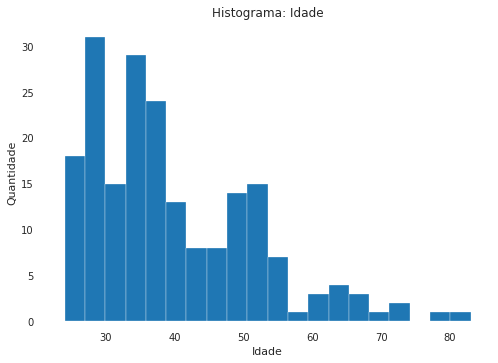

In [ ]:
# Histograma: idade
plt.hist(df.age, bins=20)
plt.title('Histograma: Idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade');

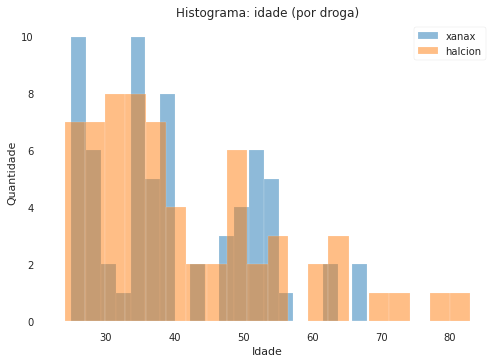

In [ ]:
# Histograma idade por droga
plt.hist(xanax.age, alpha=0.5, bins=20, label='xanax')
plt.hist(halcion.age, alpha=0.5, bins=20, label='halcion')
plt.legend()
plt.title('Histograma: idade (por droga)')
plt.xlabel('Idade')
plt.ylabel('Quantidade');

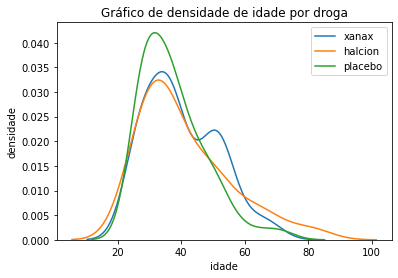

In [6]:
# Densidade: idade por droga
import seaborn as sns
sns.kdeplot(xanax.age, label='xanax')
sns.kdeplot(halcion.age, label='halcion')
sns.kdeplot(placebo.age, label='placebo')

plt.legend()
plt.title('Gráfico de densidade de idade por droga')
plt.xlabel('idade')
plt.ylabel('densidade');

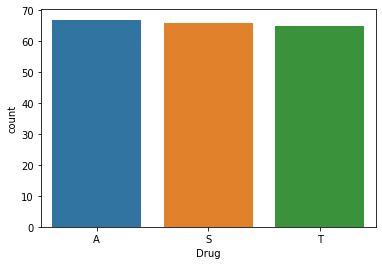

In [9]:
import seaborn as sns
sns.countplot(x=df.Drug)
plt.show()

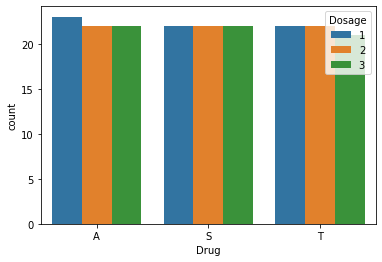

In [10]:
sns.countplot(x=df.Drug, hue=df.Dosage)
plt.show()

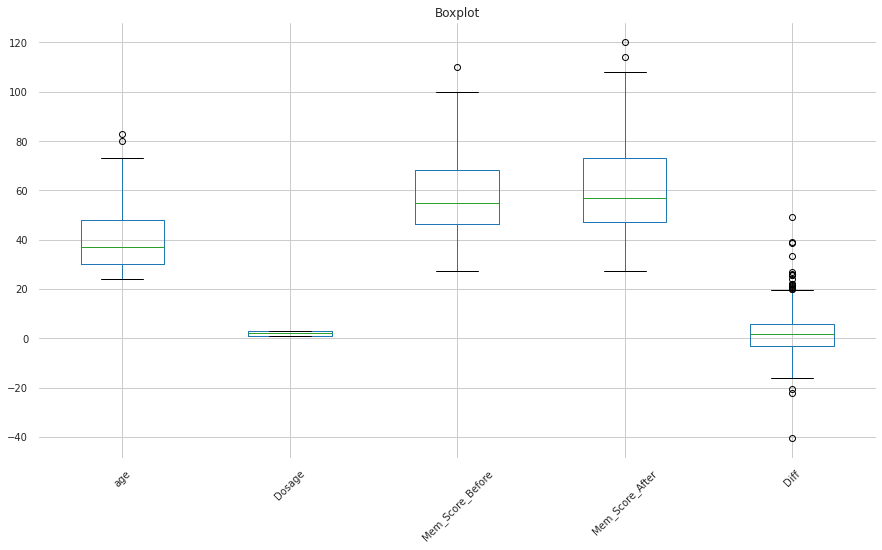

In [ ]:
# boxplot tds atributo
plt.figure(figsize=(15,8))
df.boxplot()
plt.title('Boxplot')
plt.xticks(rotation=45);

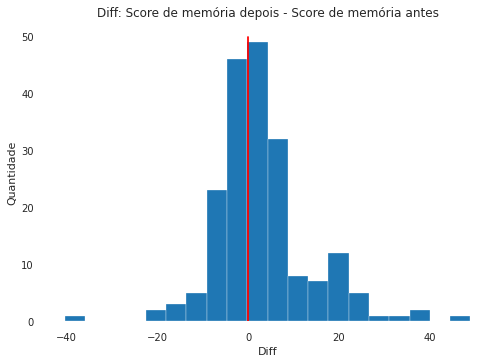

In [ ]:
# diff: diferença entre o score de memória antes e depois ==> after - before
plt.hist(df.Diff, bins=20)
plt.title('Diff: Score de memória depois - Score de memória antes')
plt.xlabel('Diff')
plt.ylabel('Quantidade');

x = [0,0]
y = [0, 50]
plt.plot(x,y, color='red');

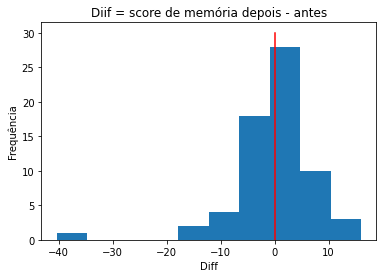

In [15]:
plt.hist(placebo.Diff)
plt.title('Diif = score de memória depois - antes')
plt.xlabel('Diff')
plt.ylabel('Frequência')

x = [0,0]
y = [0, 30]
plt.plot(x,y, color='red');
plt.show()

In [12]:
# melhora no score: placebo
sum(placebo.Diff > 0)

34

In [13]:
# piora no score: placebo
sum(placebo.Diff < 0)

31

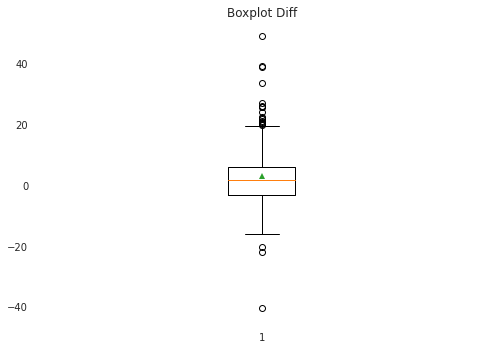

In [ ]:
# Boxplot do Diff
plt.boxplot(df.Diff, showmeans=True);
plt.title('Boxplot Diff');

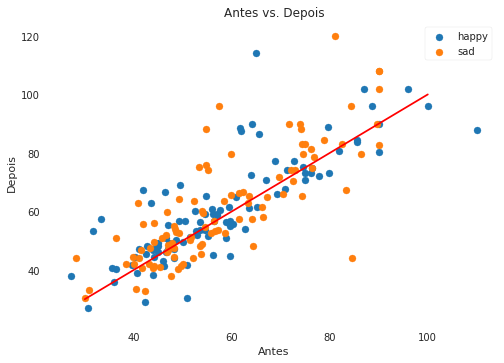

In [ ]:
# score de memória antes e depois por tipo de memória

happy = df[df.Happy_Sad_group == 'H']
sad = df[df.Happy_Sad_group == 'S']

plt.scatter(data=happy, x='Mem_Score_Before', y='Mem_Score_After', label='happy')
plt.scatter(data=sad, x='Mem_Score_Before', y='Mem_Score_After', label='sad')

plt.legend()
plt.title('Antes vs. Depois')
plt.xlabel('Antes')
plt.ylabel('Depois')

x = [30, 100]
plt.plot(x,x, color='red');

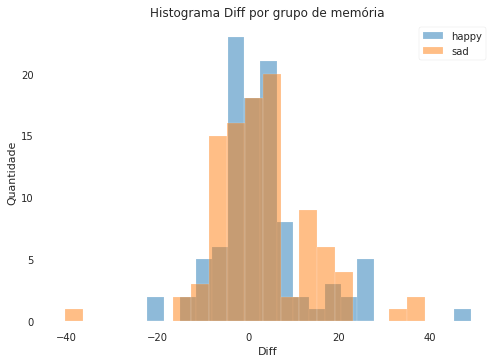

In [ ]:
# Histograma de diferença de score de memoria felizes e tristes
plt.hist(happy.Diff, alpha=0.5, bins=20, label='happy')
plt.hist(sad.Diff, alpha=0.5, bins=20, label='sad')

plt.legend()
plt.title('Histograma Diff por grupo de memória')
plt.xlabel('Diff')
plt.ylabel('Quantidade');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


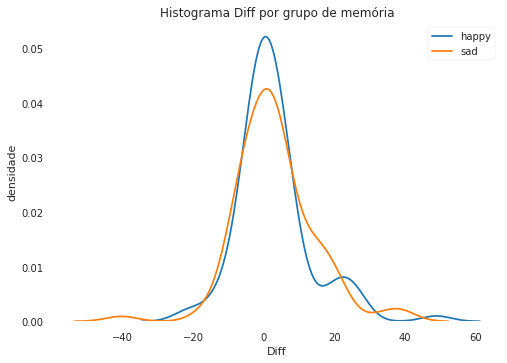

In [ ]:
sns.distplot(happy.Diff, hist=False, label='happy')
sns.distplot(sad.Diff, hist=False, label='sad')

plt.legend()
plt.title('Histograma Diff por grupo de memória')
plt.xlabel('Diff')
plt.ylabel('densidade');